###  Image stacking Concepts

#### JupyterNoteBook Writer: Radha Krishna Mallik, PhD Scholor
##### https://github.com/rkmallik360/pulsarDetection


<img src = "lightsmall-optimised.gif">

### NOTE:
- List is a collection which is ordered and changeable. Allows duplicate members.
- Tuple is a collection which is ordered and unchangeable. Allows duplicate members.
- Set is a collection which is unordered and unindexed. No duplicate members.
- Dictionary is a collection which is ordered* and changeable. No duplicate members.

In [8]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

### WORKING WITH CSV FILES

<img src = 'data1/data1.png'>
<img src = 'data1/data2.png'>
<img src = 'data1/data3.png'>

### EVALUATING MEAN AND MEDIAN OF CSV DATA FILE

- OUR CSV FILE file has several rows and columns. We want to store each row in a list and the whole file as a list of these rows.

#### METHOD 1 [BORING METHOD !!!]

In [9]:
# Python Inbuilt function to read csv file
#strip methods removes whitespace from the end of line, The split method creates a list of strings 
#using the ','characteras the seperator

data = []
for line in open('data1/data2.csv'):
    data.append(line.strip().split(','))

print('Converted csv to python list :',data)

Converted csv to python list : [['7.98631', '16.82952', '19.65165'], ['7.14460', '10.41674', '3.81853'], ['7.48549', '14.61958', '8.87193'], ['8.66521', '14.14244', '10.10248'], ['14.80968', '12.82048', '13.41792']]


In [10]:
# Python list can be converted to numpy array
arr = np.array(data)
print('Converted Python List to NumPy Array:',arr)

Converted Python List to NumPy Array: [['7.98631' '16.82952' '19.65165']
 ['7.14460' '10.41674' '3.81853']
 ['7.48549' '14.61958' '8.87193']
 ['8.66521' '14.14244' '10.10248']
 ['14.80968' '12.82048' '13.41792']]


In [11]:
type(arr[1,2])

numpy.str_

In [12]:
#convert string data of array to numbers
arr1 = np.asarray(arr, float)
print('Conveted Strings of Numpy Array to Numbers:',arr1)
print('Shape of Array: ',arr.shape)

Conveted Strings of Numpy Array to Numbers: [[ 7.98631 16.82952 19.65165]
 [ 7.1446  10.41674  3.81853]
 [ 7.48549 14.61958  8.87193]
 [ 8.66521 14.14244 10.10248]
 [14.80968 12.82048 13.41792]]
Shape of Array:  (5, 3)


In [13]:
mean = round(np.mean(arr1),1)
median = round(np.median(arr1),1)
print ("mean of array is:",mean,"and Median of array is:",median)

mean of array is: 11.4 and Median of array is: 10.4


### METHOD 2 [ Directly loading CSV Data File and Coverting it to Array of Numbers

In [14]:
# NumPy Load txt function read csv file automatecally as numpy array and convert string to numbers
# Write your calc_stats function here.
def calc_stats(p):
  data = np.loadtxt(p,delimiter=',') # spaces removed and replaced by comma
  return (round(np.mean(data),1),round(np.median(data),1))



#### Load the function and evaluate mean and median

In [15]:
# Run `calc_stats` function with loading csv file converting it to list:
mean,median = calc_stats('data1/data2.csv')
print(mean,median)

11.4 10.4


### EVALUATING MEAN OF EACH CELL FROM CSV DATA SETS

- Write a mean_datasets function that reads in a list of CSV files and returns an array of the mean of each cell in the data files

<img src = "data2/data1.png">
<img src = "data2/data2.png">
<img src = "data2/data3.png">

#### APPROACH 1...!!!

In [16]:
# Write your mean_datasets function here
import numpy as np
def mean_datasets(p):  
  for i in range(len(p)):    # i = 0,1,2,...len(p)-1
    p[i] = np.loadtxt(p[i],delimiter = ',') # Loading and reading csv data file and removing white spaces by comma
  sum_data = sum(k for k in p)     # sum of numpy arrays ( note p is list of arrays) element wise sum
  return np.round(sum_data/len(p),1) # element wise division of sum_data array with no of arrays to evaluate average



In [17]:
# List the Input csv files and Call your function to get average of the csv files
file1 = ['data2/data1.csv', 'data2/data2.csv', 'data2/data3.csv']
file2 = ['data2/data4.csv', 'data2/data5.csv', 'data2/data6.csv']
print("Mean of dataset 1: ",mean_datasets(file1))
print("Mean of dataset 2: ",mean_datasets(file2))

Mean of dataset 1:  [[11.  11.9 13. ]
 [ 9.5  6.8  9.4]
 [ 7.2 11.1 12.5]
 [ 8.8  7.3  9.2]
 [16.6 10.6 10.3]]
Mean of dataset 2:  [[-2.9  2.6  0.6 -5.4]
 [-4.4 -0.7  0.7 -0.2]
 [-1.7  2.5 -8.7 -5.4]]


### APPROACH 2

In [18]:
def mean_datasets(files):
    #Find each cell mean across a series of data sets.................
    sum_data = sum(np.loadtxt(file, delimiter=',') for file in files)
    return np.round(sum_data/len(files), 1)
        

files1 = ['data1.csv', 'data2.csv', 'data3.csv']
files2 = ['data4.csv', 'data5.csv', 'data6.csv']
print("Mean of dataset 1: ",mean_datasets(['data2/' + file for file in files1]))
print("Mean of dataset 2: ",mean_datasets(['data2/' + file for file in files2]))

Mean of dataset 1:  [[11.  11.9 13. ]
 [ 9.5  6.8  9.4]
 [ 7.2 11.1 12.5]
 [ 8.8  7.3  9.2]
 [16.6 10.6 10.3]]
Mean of dataset 2:  [[-2.9  2.6  0.6 -5.4]
 [-4.4 -0.7  0.7 -0.2]
 [-1.7  2.5 -8.7 -5.4]]


### 3) WORKING WITH "FLEXIBLE IMAGE TRANSPORT SYSTEM" (FITS ) FILE

#### We're going to use the Astropy module to read and write FITS File

- `FITS` (Flexible Image Transport System) is the data format most widely used within astronomy for transporting, analyzing, and archiving scientific data files. FITS is much more than just another image format (such as JPG or GIF) and is primarily designed to store scientific data sets consisting of multidimensional arrays (images) and 2-dimensional tables organized into rows and columns of information.



- For downloading fits file corresponding to Sloan Digital Sky Survey
- https://dr12.sdss.org/fields/

- The Sloan Digital Sky Survey has created the most detailed three-dimensional maps of the Universe ever made, with deep multi-color images of one third of the sky, and spectra for more than three million astronomical objects. Learn and explore all phases and surveys—past, present, and future—of the SDSS

- `HDUs`:   A FITS file is comprised of segments called Header/Data Units (HDUs), where the first HDU is called the `Primary HDU`, or `Primary Array`. The primary data array can contain a 1-999 dimensional array of 1, 2 or 4 byte integers or 4 or 8 byte floating point. A typical primary array could contain a 1-D spectrum, a 2-D image, or a 3-D data cube.


- Importing AstroPY Package and opening fits file to see its header informations
- Opening a FITS file in Astropy returns a HDU (Header/Data Unit) list. 
- Each HDU stores headers and (optionally) image data.
- The header contains metadata about the HDU object, e.g. its dimensions and data type.
- Every HDU can contain image data. The first HDU is called the primary HDU.
- If we want to access individual HDUs, we can index the HDU list object returned by fits.open. 

![image](http://www.stsci.edu/instruments/wfpc2/Wfpc2_dhb/images/intro_ch2a.gif)


In [54]:
M42 = fits.open('frame-g-006073-4-0063.fits')
M42.info()

Filename: frame-g-006073-4-0063.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      96   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   


In [60]:
M42[0].header

SIMPLE  =                    T /                                                
BITPIX  =                  -32 / 32 bit floating point                          
NAXIS   =                    2                                                  
NAXIS1  =                 2048                                                  
NAXIS2  =                 1489                                                  
EXTEND  =                    T /Extensions may be present                       
BZERO   =              0.00000 /Set by MRD_SCALE                                
BSCALE  =              1.00000 /Set by MRD_SCALE                                
TAI     =        4649973400.67 / 1st row Number of seconds since Nov 17 1858    
RA      =            83.820000 / 1st row RA of telescope boresight (deg)        
DEC     =           -5.947992  / 1st row Dec of telescope boresight (degrees)   
SPA     =             180.000  / 1st row Cam col position angle wrt N (deg)     
IPA     =             137.10

- know the meaning of key words from this website
- https://heasarc.gsfc.nasa.gov/docs/fcg/standard_dict.html

### BACK TO OUR RADIO ASTRONOMY DATA FILES

In [78]:
hdulist = fits.open('data3/image0.fits')
hdulist.info()

Filename: data3/image0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (200, 200)   float64   


In [79]:
hdulist[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  200                                                  
NAXIS2  =                  200                                                  
NUM     =                 1700                                                  
P       = 'P       '                                                            

- Regarding keywords and its meaning visit this website  https://heasarc.gsfc.nasa.gov/docs/fcg/standard_dict.html

In [80]:
#The image data can be accessed using the data attribute:
data = hdulist[0].data
print(data.shape)
print(type(data))

(200, 200)
<class 'numpy.ndarray'>


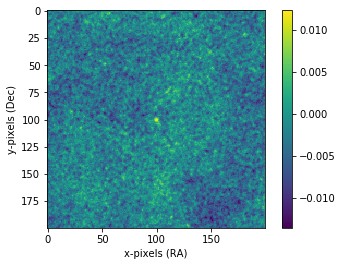

In [81]:
# Plot the 2D array corresponding to Fits file
plt.imshow(data, cmap = plt.cm.viridis)
plt.xlabel("x-pixels (RA)")
plt.ylabel("y-pixels (Dec)")
plt.colorbar()
plt.show()


- different Perceptually Uniform Sequential color map options


<img src = "sphx_glr_colormaps_001.png">

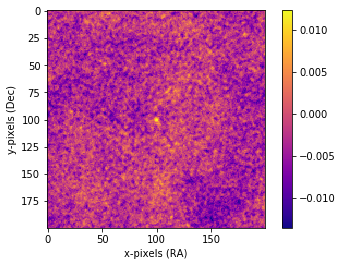

In [82]:
# Plot the 2D array corresponding to Fits file
plt.imshow(data, cmap = plt.cm.plasma) # try different color maps for better visibility
plt.xlabel("x-pixels (RA)")
plt.ylabel("y-pixels (Dec)")
plt.colorbar()
plt.show()

### TO FIND POSITION OF BRIGHTEST POSITION OF THE PIXEL IN FITS IMAGE

In [83]:
# write a function load_fits to load a file and extract brightest pixel location

def load_fits(imageName):
  hdulist = fits.open(imageName)
  data = hdulist[0].data
  ind = np.unravel_index(np.argmax(data, axis=None), data.shape)
  return ind

### IMAGE0.FITS 

Location of Bright Pixel (RA,DEC):  (100, 100)


<function matplotlib.pyplot.show(*args, **kw)>

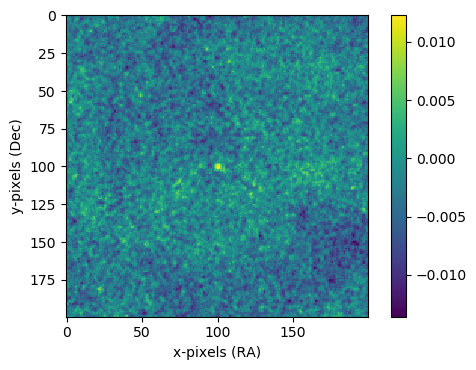

In [91]:
## WORKING WITH IMAGE0.FITS 

# Loading fits file
hdulist = fits.open("data3/image0.fits")
data = hdulist[0].data

# extract brightest pixel location
bright_pixel_location = np.unravel_index(np.argmax(data, axis=None), data.shape)
print("Location of Bright Pixel (RA,DEC): ",bright_pixel_location)

# Plotting the fits file 
plt.figure(dpi=100)
plt.imshow(data.T,cmap=plt.cm.viridis)
plt.xlabel("x-pixels (RA)")
plt.ylabel("y-pixels (Dec)")
plt.colorbar()
plt.show

### IMAGE1.FITS 

Location of Bright Pixel (RA,DEC):  (101, 100)


<function matplotlib.pyplot.show(*args, **kw)>

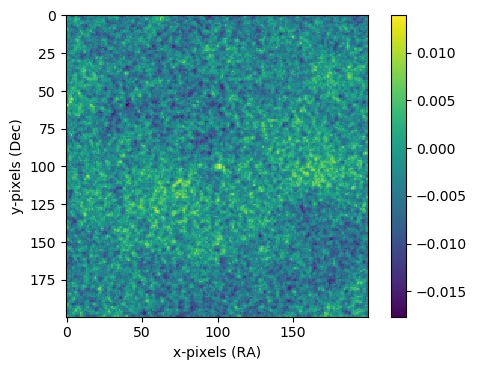

In [92]:
## WORKING WITH IMAGE1.FITS 

# Loading fits file
hdulist = fits.open("data3/image1.fits")
data = hdulist[0].data

# extract brightest pixel location
bright_pixel_location = np.unravel_index(np.argmax(data, axis=None), data.shape)
print("Location of Bright Pixel (RA,DEC): ",bright_pixel_location)

# Plotting the fits file 
plt.figure(dpi=100)
plt.imshow(data.T,cmap=plt.cm.viridis)
plt.xlabel("x-pixels (RA)")
plt.ylabel("y-pixels (Dec)")
plt.colorbar()
plt.show

### IMAGE2.FITS 

Location of Bright Pixel (RA,DEC):  (14, 125)


<function matplotlib.pyplot.show(*args, **kw)>

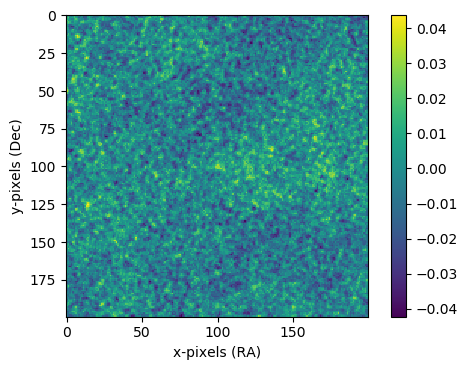

In [93]:
## WORKING WITH IMAGE2.FITS 

# Loading fits file
hdulist = fits.open("data3/image2.fits")
data = hdulist[0].data

# extract brightest pixel location
bright_pixel_location = np.unravel_index(np.argmax(data, axis=None), data.shape)
print("Location of Bright Pixel (RA,DEC): ",bright_pixel_location)

# Plotting the fits file 
plt.figure(dpi=100)
plt.imshow(data.T,cmap=plt.cm.viridis)
plt.xlabel("x-pixels (RA)")
plt.ylabel("y-pixels (Dec)")
plt.colorbar()
plt.show

### IMAGE3.FITS 

Location of Bright Pixel (RA,DEC):  (4, 55)


<function matplotlib.pyplot.show(*args, **kw)>

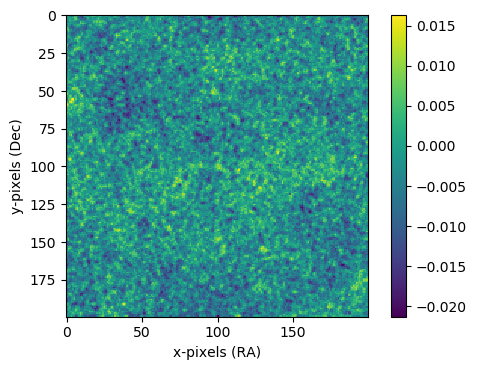

In [94]:
## WORKING WITH IMAGE3.FITS 

# Loading fits file
hdulist = fits.open("data3/image3.fits")
data = hdulist[0].data

# extract brightest pixel location
bright_pixel_location = np.unravel_index(np.argmax(data, axis=None), data.shape)
print("Location of Bright Pixel (RA,DEC): ",bright_pixel_location)

# Plotting the fits file 
plt.figure(dpi=100)
plt.imshow(data.T,cmap=plt.cm.viridis)
plt.xlabel("x-pixels (RA)")
plt.ylabel("y-pixels (Dec)")
plt.colorbar()
plt.show

### 4) EVALUATING SINGLE MEAN FITS FILE FROM SET OF FITS FILE

In [89]:
# Write your mean_datasets function here

def mean_fits(p):  
  for i in range(len(p)):  # Extract data from fits files
    p[i] = fits.open(p[i])
    p[i] = p[i][0].data
  sum_data = sum(k for k in p) # elementeise sum of pixel intensity 
  return np.round(sum_data/len(p),5) # Return average single file with pixel indicating average flux intensity


# Write Plot Function for the matplotlib

def plot_fits(data,dpi):
    plt.figure(dpi=100)    
    plt.imshow(data.T, cmap=plt.cm.viridis)
    plt.xlabel("x-pixels (RA)")
    plt.ylabel("y-pixels (Dec)")
    plt.colorbar()
    plt.show()
    

Pulsar Detection at (RA,DEC): (101, 100)


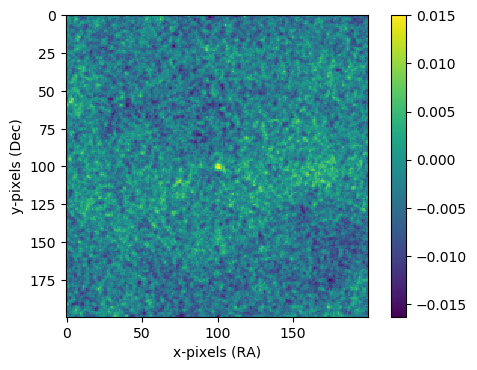

In [96]:
# List the Input FITS files and Call your function to get average of the FITS files

#file1 = ['data5/image0.fits', 'data4/image1.fits', 'data4/image2.fits','data4/image3.fits','data4/image4.fits'...]
file1 = ['data5/image{}.fits'.format(str(i)) for i in range(11)]

# call mean function
data = mean_fits(file1)
ind = np.unravel_index(np.argmax(data), data.shape)

print("Pulsar Detection at (RA,DEC):",ind)

# Plot the Average FITS File
plot_fits(data,100)


### USING 1000 NOS OF FITS FILE FOR STACKING FORM FOLDER PULSAR_EXAMPLE_FITS_1000

In [100]:
# List the Input FITS files and Call your function to get average of the FITS files
n = 500 # no of image file to stack, max limit 1000
file1 = ['pulsar_example_fits_1000/{}.fits'.format(str(i).zfill(4)) for i in range(n)]
data = mean_fits(file1)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.Traceback (most recent call last):
  File "/Users/user/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-100-d72c834f8bcb>", line 4, in <module>
    data = mean_fits(file1)
  File "<ipython-input-89-e7798a76c100>", line 4, in mean_fits
    p[i] = fits.open(p[i])
  File "/Users/user/opt/anaconda3/lib/python3.7/site-packages/astropy/io/fits/hdu/hdulist.py", line 158, in fitsopen
    lazy_load_hdus, **kwargs)
  File "/Users/user/opt/anaconda3/lib/python3.7/site-packages/astropy/io/fits/hdu/hdulist.py", line 397, in fromfile
    lazy_load_hdus=lazy_load_hdus, **kwargs)
  File "/Users/user/opt/anaconda3/lib/python3.7/site-packages/astropy/io/fits/hdu/hdulist.py", line 1046, in _readfrom
    fileobj = _File(fileobj, mode=mod

OSError: [Errno 24] Too many open files: 'pulsar_example_fits_1000/0000.fits'

Exception in thread IPythonHistorySavingThread:
Traceback (most recent call last):
  File "/Users/user/opt/anaconda3/lib/python3.7/site-packages/IPython/core/history.py", line 834, in run
  File "</Users/user/opt/anaconda3/lib/python3.7/site-packages/decorator.py:decorator-gen-23>", line 2, in writeout_cache
  File "/Users/user/opt/anaconda3/lib/python3.7/site-packages/IPython/core/history.py", line 58, in needs_sqlite
  File "/Users/user/opt/anaconda3/lib/python3.7/site-packages/IPython/core/history.py", line 780, in writeout_cache
  File "/Users/user/opt/anaconda3/lib/python3.7/site-packages/IPython/core/history.py", line 764, in _writeout_input_cache
sqlite3.OperationalError: unable to open database file

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel/iostream.py", line 97, in _event_pipe
AttributeError: '_thread._local' object has no attribute 'event_pipe

Pulsar Detection at (RA,DEC): (171, 161)


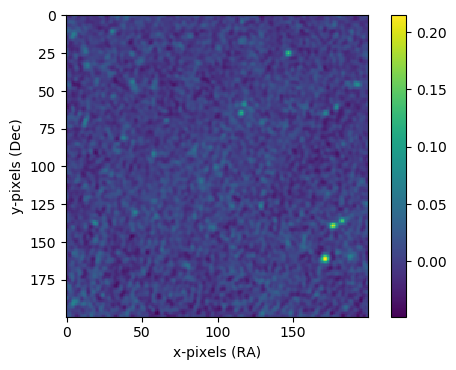

In [98]:
ind = np.unravel_index(np.argmax(data, axis=None), data.shape)
print("Pulsar Detection at (RA,DEC):",ind)
# Plot the Average FITS File
plot_fits(data,100)

### USING 7330 NOS OF FITS FILE FOR STACKING FORM FOLDER PULSAR_EXAMPLE_FITS_7330

In [99]:
# List the Input FITS files and Call your function to get average of the FITS files
n = 7330 # no of image file to stack, max limit 7329
file1 = ['pulsar_example_fits_7330/{}.fits'.format(str(i).zfill(4)) for i in range(n)]
mean_data = mean_fits(file1)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/user/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-99-adf041e7e4f1>", line 4, in <module>
    mean_data = mean_fits(file1)
  File "<ipython-input-89-e7798a76c100>", line 5, in mean_fits
    p[i] = p[i][0].data
  File "/Users/user/opt/anaconda3/lib/python3.7/site-packages/astropy/utils/decorators.py", line 744, in __get__
    val = self.fget(obj)
  File "/Users/user/opt/anaconda3/lib/python3.7/site-packages/astropy/io/fits/hdu/image.py", line 230, in data
  File "/Users/user/opt/anaconda3/lib/python3.7/site-packages/astropy/io/fits/hdu/image.py", line 697, in _get_scaled_image_data
  File "/Users/user/opt/anaconda3/lib/python3.7/site-packages/astropy/io/fits/hdu/base.py", line 507, in _get_raw_data
  File "/Users/user/opt/anaconda3/lib/python3.7/site-packages/astropy/io/fits/file.py", line 326, in readarray
 

OSError: [Errno 24] Too many open files

In [ ]:
ind = np.unravel_index(np.argmax(data, axis=None), data.shape)
print("Pulsar Detection at (RA,DEC):",ind)
# Plot the Average FITS File
plot_fits(mean_data,100)